### NAMA : Bimasakti Cahyo Utomo
### NIM  : 2209106021
## POSTTEST 5

In [551]:
import pandas as pd

In [552]:
df = pd.read_csv('chip_dataset.csv')
df

,Unnamed: 0,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD,NaN,NaN,NaN
1,1,AMD Athlon 200GE,CPU,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,Unknown,AMD,NaN,NaN,NaN
2,2,Intel Core i5-1145G7,CPU,2020-09-02,10.0,28.0,NaN,NaN,2600.0,Intel,Intel,NaN,NaN,NaN
3,3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,Intel,Intel,NaN,NaN,NaN
4,4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45.0,125.0,258.0,758.0,3700.0,Unknown,AMD,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4849,4849,NVIDIA Quadro 3000M,GPU,2011-02-22,40.0,75.0,332.0,1950.0,450.0,TSMC,NVIDIA,NaN,432.0,36.0
4850,4850,Intel GMA 950,GPU,2005-06-01,90.0,7.0,NaN,NaN,250.0,Intel,Intel,NaN,NaN,NaN
4851,4851,NVIDIA GeForce GT 320M,GPU,2010-03-03,40.0,23.0,100.0,486.0,500.0,TSMC,NVIDIA,NaN,52.8,NaN
4852,4852,NVIDIA GeForce FX 5200,GPU,2003-03-06,150.0,NaN,65.0,29.0,250.0,TSMC,NVIDIA,NaN,NaN,NaN


## Data Preprocesing

In [553]:
import numpy as np

In [554]:
df.isnull().sum()

Unnamed: 0                  0
Product                     0
Type                        0
Release Date                0
Process Size (nm)           9
TDP (W)                   626
Die Size (mm^2)           715
Transistors (million)     711
Freq (MHz)                  0
Foundry                     0
Vendor                      0
FP16 GFLOPS              4318
FP32 GFLOPS              2906
FP64 GFLOPS              3548
dtype: int64

In [555]:
df['Process Size (nm)'] = df['Process Size (nm)'].fillna(df['Process Size (nm)'].mean())
df['TDP (W)'] = df['TDP (W)'].fillna(df['TDP (W)'].mean())
df['Die Size (mm^2)'] = df['Die Size (mm^2)'].fillna(df['Die Size (mm^2)'].mean())
df['Transistors (million)'] = df['Transistors (million)'].fillna(df['Transistors (million)'].mean())
df['FP16 GFLOPS'] = df['FP16 GFLOPS'].fillna(df['FP16 GFLOPS'].mean())
df['FP32 GFLOPS'] = df['FP32 GFLOPS'].fillna(df['FP32 GFLOPS'].mean())
df['FP64 GFLOPS'] = df['FP64 GFLOPS'].fillna(df['FP64 GFLOPS'].mean())
df.isnull().sum()

Unnamed: 0               0
Product                  0
Type                     0
Release Date             0
Process Size (nm)        0
TDP (W)                  0
Die Size (mm^2)          0
Transistors (million)    0
Freq (MHz)               0
Foundry                  0
Vendor                   0
FP16 GFLOPS              0
FP32 GFLOPS              0
FP64 GFLOPS              0
dtype: int64

In [556]:
df.drop(columns='Unnamed: 0', inplace=True)
df.select_dtypes(['int64' , 'float64']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Process Size (nm)      4854 non-null   float64
 1   TDP (W)                4854 non-null   float64
 2   Die Size (mm^2)        4854 non-null   float64
 3   Transistors (million)  4854 non-null   float64
 4   Freq (MHz)             4854 non-null   float64
 5   FP16 GFLOPS            4854 non-null   float64
 6   FP32 GFLOPS            4854 non-null   float64
 7   FP64 GFLOPS            4854 non-null   float64
dtypes: float64(8)
memory usage: 303.5 KB


In [557]:
df.select_dtypes('object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product       4854 non-null   object
 1   Type          4854 non-null   object
 2   Release Date  4854 non-null   object
 3   Foundry       4854 non-null   object
 4   Vendor        4854 non-null   object
dtypes: object(5)
memory usage: 189.7+ KB


##### Remove Outlier

In [558]:
# Q1_tdp = df['TDP (W)'].quantile(0.25)
# Q3_tdp = df['TDP (W)'].quantile(0.75)
# Q1_freq = df['Freq (MHz)'].quantile(0.25)
# Q3_freq = df['Freq (MHz)'].quantile(0.75)

# IQR_tdp = Q3_tdp - Q1_tdp
# lower_tdp = Q1_tdp - 1.5*IQR_tdp
# upper_tdp = Q3_tdp + 1.5*IQR_tdp
# IQR_freq = Q3_freq - Q1_freq
# lower_freq = Q1_freq - 1.5*IQR_freq
# upper_freq = Q3_freq + 1.5*IQR_freq

# upper_array_tdp = np.where(df['TDP (W)']>=upper_tdp)[0]
# lower_array_tdp = np.where(df['TDP (W)']<=lower_tdp)[0]
# upper_array_freq = np.where(df['Freq (MHz)']>=upper_freq)[0]
# lower_array_freq = np.where(df['Freq (MHz)']<=lower_freq)[0]

# df.drop(index=upper_array_tdp, inplace=True)
# df.drop(index=lower_array_tdp, inplace=True)
# df.drop(index=upper_array_freq, inplace=True)
# df.drop(index=lower_array_freq, inplace=True)

In [559]:
from scipy import stats

df = df[(np.abs(stats.zscore(df.select_dtypes(['int64' , 'float64']))) < 3).all(axis=1)]

## A. Supervised Learning

### A1.
#### Klasifikasi  
#### Support Vector Classifier (SVM) 

In [560]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.svm import SVC

In [561]:
pembanding = 'Type'
data_banding_a = 'Freq (MHz)'
data_banding_b = 'TDP (W)'

In [562]:
X = df[[data_banding_a , data_banding_b]]
y = df[pembanding]

X_train, X_test , y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)

#### Scaling

In [563]:
mm = MinMaxScaler()
X_train = mm.fit_transform(X_train)
X_test = mm.transform(X_test)

In [564]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

#### Train Model

In [565]:
svm = SVC(kernel = 'linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [566]:
y_pred = svm.predict(X_test)

### A2. Hasil Prediksi

#### Confusion Matrix

In [567]:
from sklearn.metrics import confusion_matrix

In [568]:
cm =confusion_matrix(y_test, y_pred)
cm

array([[634,  34],
       [ 15, 704]], dtype=int64)

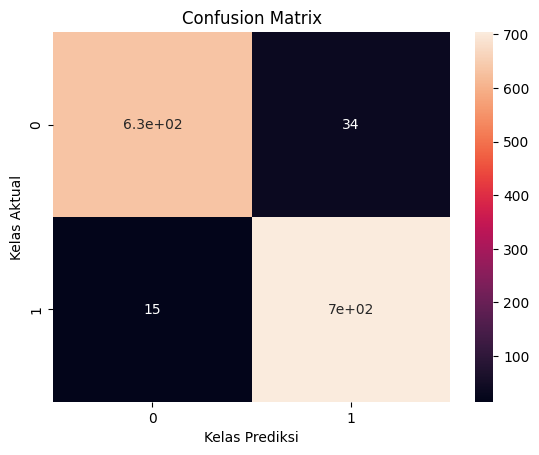

In [569]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Kelas Prediksi')
plt.ylabel('Kelas Aktual')
plt.show()

In [570]:
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred) # ALL IN ONE
print(report)

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       668
           1       0.95      0.98      0.97       719

    accuracy                           0.96      1387
   macro avg       0.97      0.96      0.96      1387
weighted avg       0.96      0.96      0.96      1387



### A3. Plot

In [571]:
support_vectors = svm.support_vectors_
support_vector_indices = np.where(np.isin(X_train, support_vectors).all(axis=1))

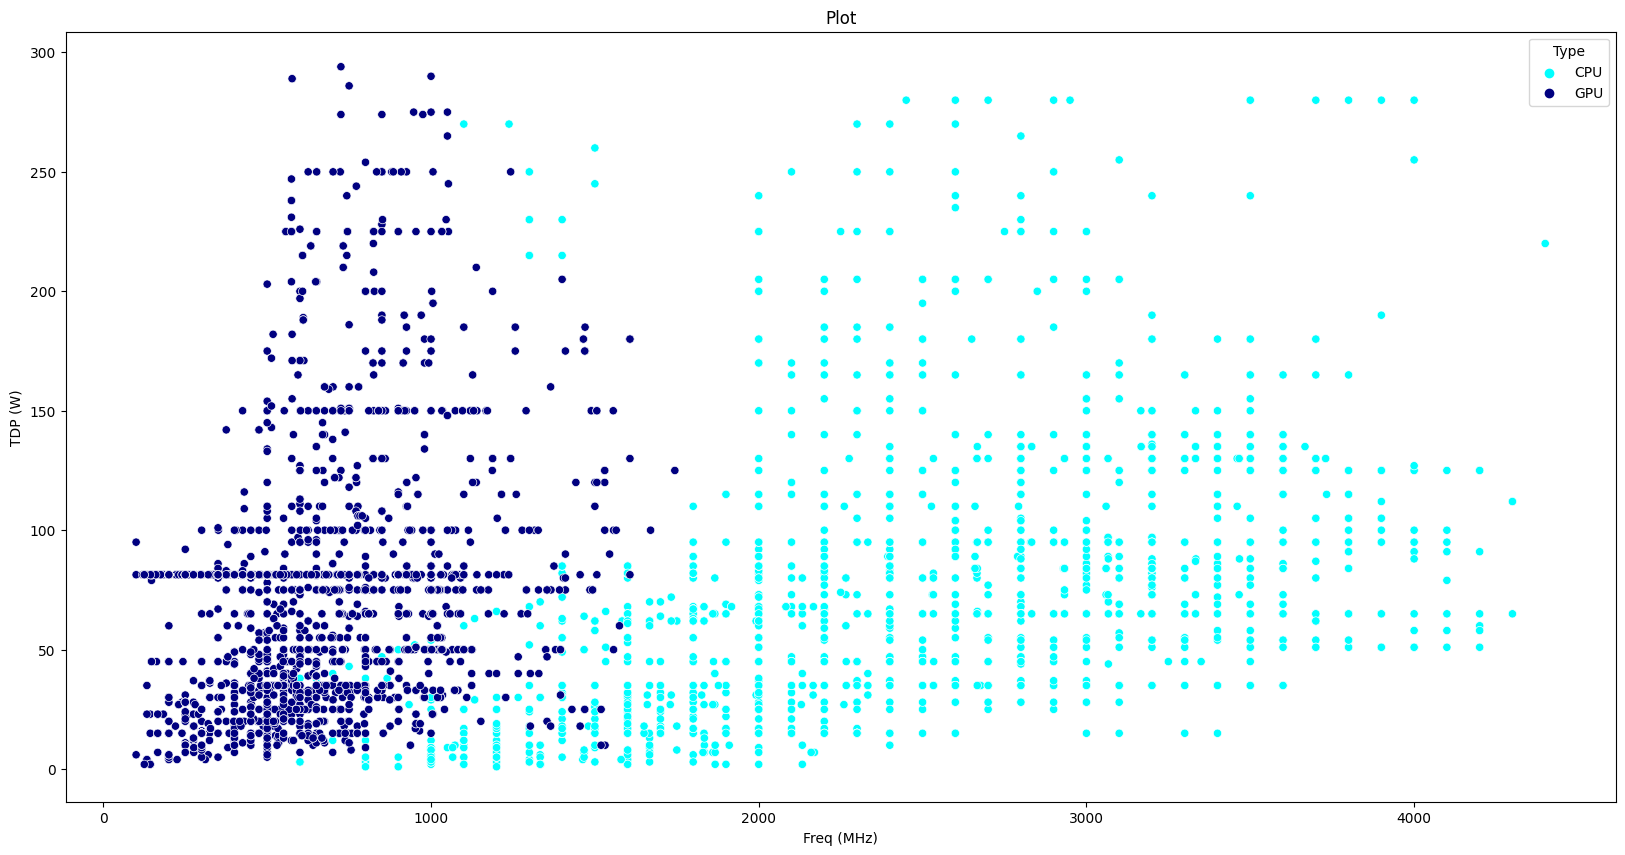

In [572]:
from sklearn.inspection import DecisionBoundaryDisplay

plt.figure(figsize=(20,10))
plt.title('Plot')
warna = ["aqua", "navy"]
sns.scatterplot(x=df[data_banding_a], y=df[data_banding_b], hue=pembanding, data=df, palette=warna)

plt.show()

## B.Unsupervised Learning

In [573]:
from sklearn.cluster import KMeans

### B1

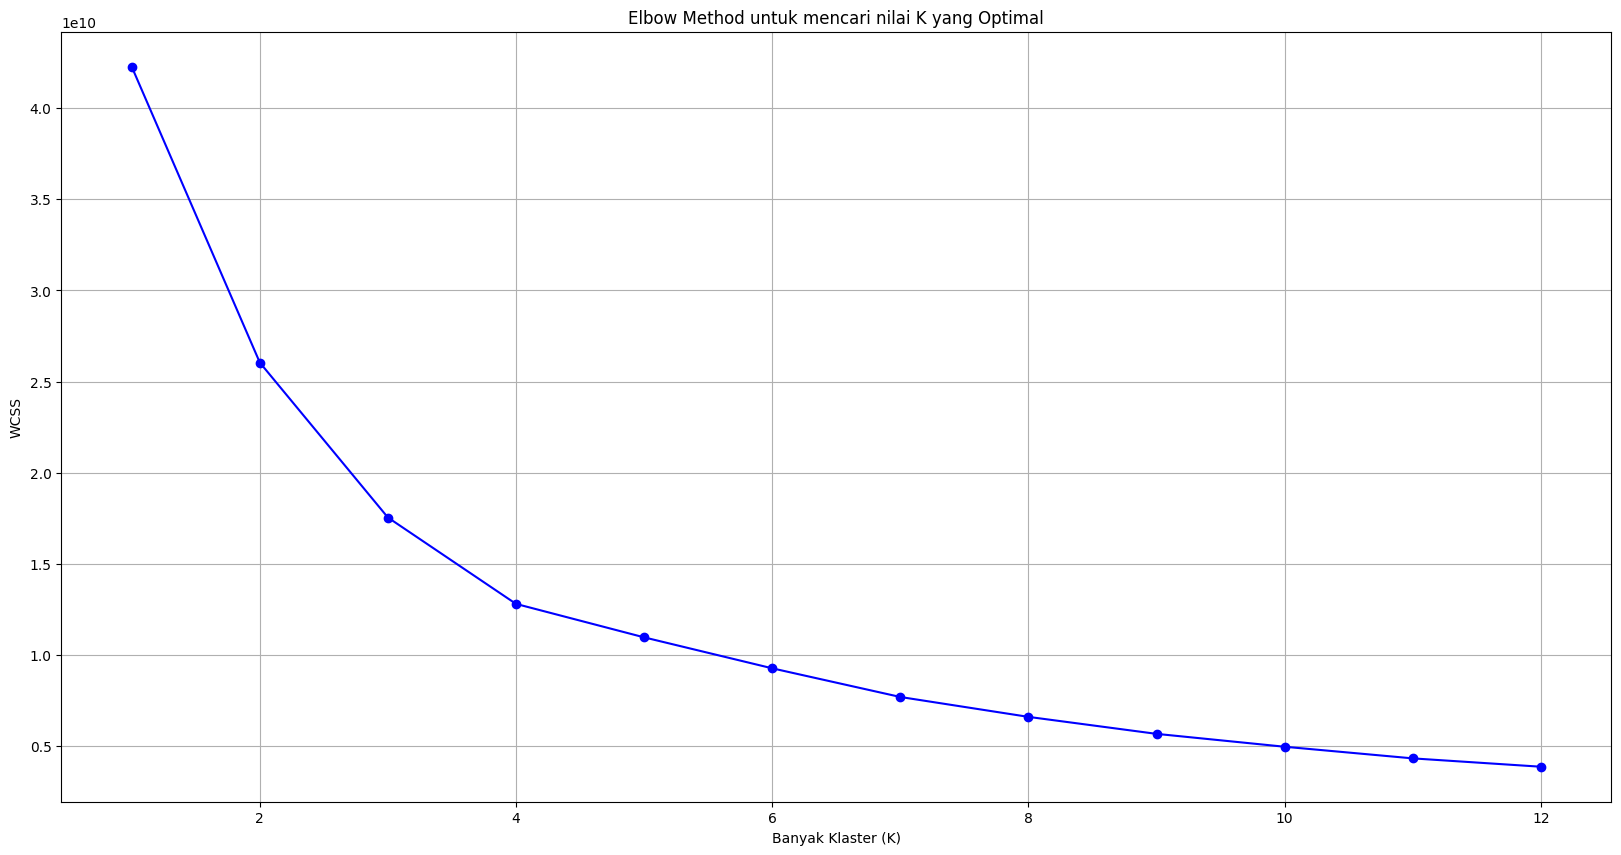

In [574]:
X = df.select_dtypes(['int64' , 'float64']).values
wcss = []

for k in range(1, 13):
    model = KMeans(n_clusters=k, n_init=10, random_state=0)
    model.fit(X)
    wcss.append(model.inertia_)

plt.figure(figsize=(20, 10))
plt.plot(range(1, 13), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method untuk mencari nilai K yang Optimal')
plt.xlabel('Banyak Klaster (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

C:\Users\Bimasakti Cahyo Utom\AppData\Local\Temp\ipykernel_16116\496409581.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["clusters"] = cluster_labels


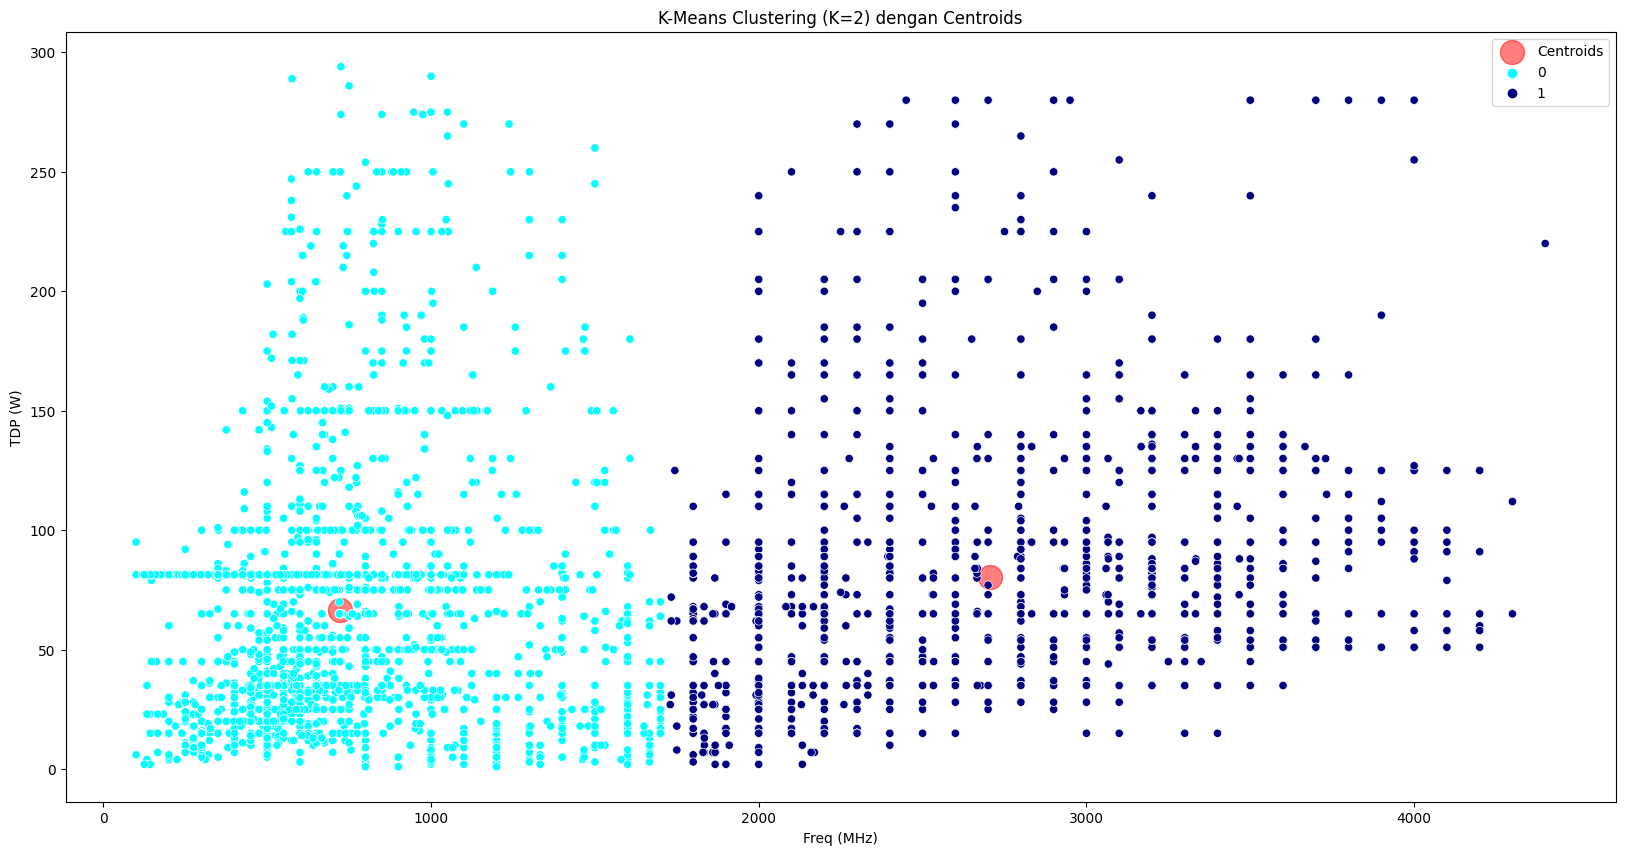

In [575]:
plt.figure(figsize=(20,10))

X = df[[data_banding_a , data_banding_b]]
K = 2
kmeans = KMeans(n_clusters=K, n_init=10) 
kmeans.fit(X) 
cluster_labels = kmeans.labels_ 
df["clusters"] = cluster_labels 
centroids = kmeans.cluster_centers_ 
plt.scatter(centroids[:, 0], centroids[:, 1], alpha=0.5, c='red', s=300,
label='Centroids')

sns.scatterplot(data=df, x=data_banding_a, y=data_banding_b, hue="clusters", palette=warna)

plt.title(f"K-Means Clustering (K={K}) dengan Centroids")
plt.xlabel(data_banding_a)
plt.ylabel(data_banding_b)
plt.legend()
plt.show()

#### B2

##### - Label

In [576]:
import pandas as pd
from sklearn.metrics import adjusted_rand_score # ARI
from sklearn.metrics import normalized_mutual_info_score # NMI
from sklearn.metrics import homogeneity_score, completeness_score,v_measure_score # HCV-M
# Buat crosstab untuk membandingkan cluster labels dengan true labels
cross_tab = pd.crosstab(df["clusters"], df[pembanding])
print("Cross-Tabulation:")
print(cross_tab, "\n")

# Adjusted Rand Index (ARI)
ari = adjusted_rand_score(df[pembanding], cluster_labels)
print(f"Adjusted Rand Index (ARI): {ari:.2f}")
# Normalized Mutual Information (NMI)
# Konversi nama pada kolom ‘species’ menjadi numerik
true_labels_num = df[pembanding].astype("category").cat.codes
nmi = normalized_mutual_info_score(true_labels_num, cluster_labels)
print(f"Normalized Mutual Information (NMI): {nmi:.2f}")
# Fungsi HCV-M
homogeneity = homogeneity_score(df[pembanding], cluster_labels)
completeness = completeness_score(df[pembanding], cluster_labels)
v_measure = v_measure_score(df[pembanding], cluster_labels)
print(f"Homogeneity Score: {homogeneity:.2f}")
print(f"Completeness Score: {completeness:.2f}")
print(f"V-Measure Score: {v_measure:.2f}")

Cross-Tabulation:
Type       CPU   GPU
clusters            
0          357  2449
1         1815     1 

Adjusted Rand Index (ARI): 0.71
Normalized Mutual Information (NMI): 0.67
Homogeneity Score: 0.66
Completeness Score: 0.68
V-Measure Score: 0.67


#### - Unlabeled

In [577]:
from sklearn.metrics import silhouette_score, davies_bouldin_score,calinski_harabasz_score

ss_score = silhouette_score(X, cluster_labels)
print(f"Silhouette Score: {ss_score:.2f}")
db_index = davies_bouldin_score(X, cluster_labels)
print(f"Davies-Bouldin Index: {db_index:.2f}")
ch_index = calinski_harabasz_score(X, cluster_labels)
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score: 0.70
Davies-Bouldin Index: 0.42
Calinski-Harabasz Index: 18362.50


#### B3

##### - Label Asli

C:\Users\Bimasakti Cahyo Utom\AppData\Local\Temp\ipykernel_16116\1030611317.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cluster2"] = df["clusters"].map(cluster_mapping)


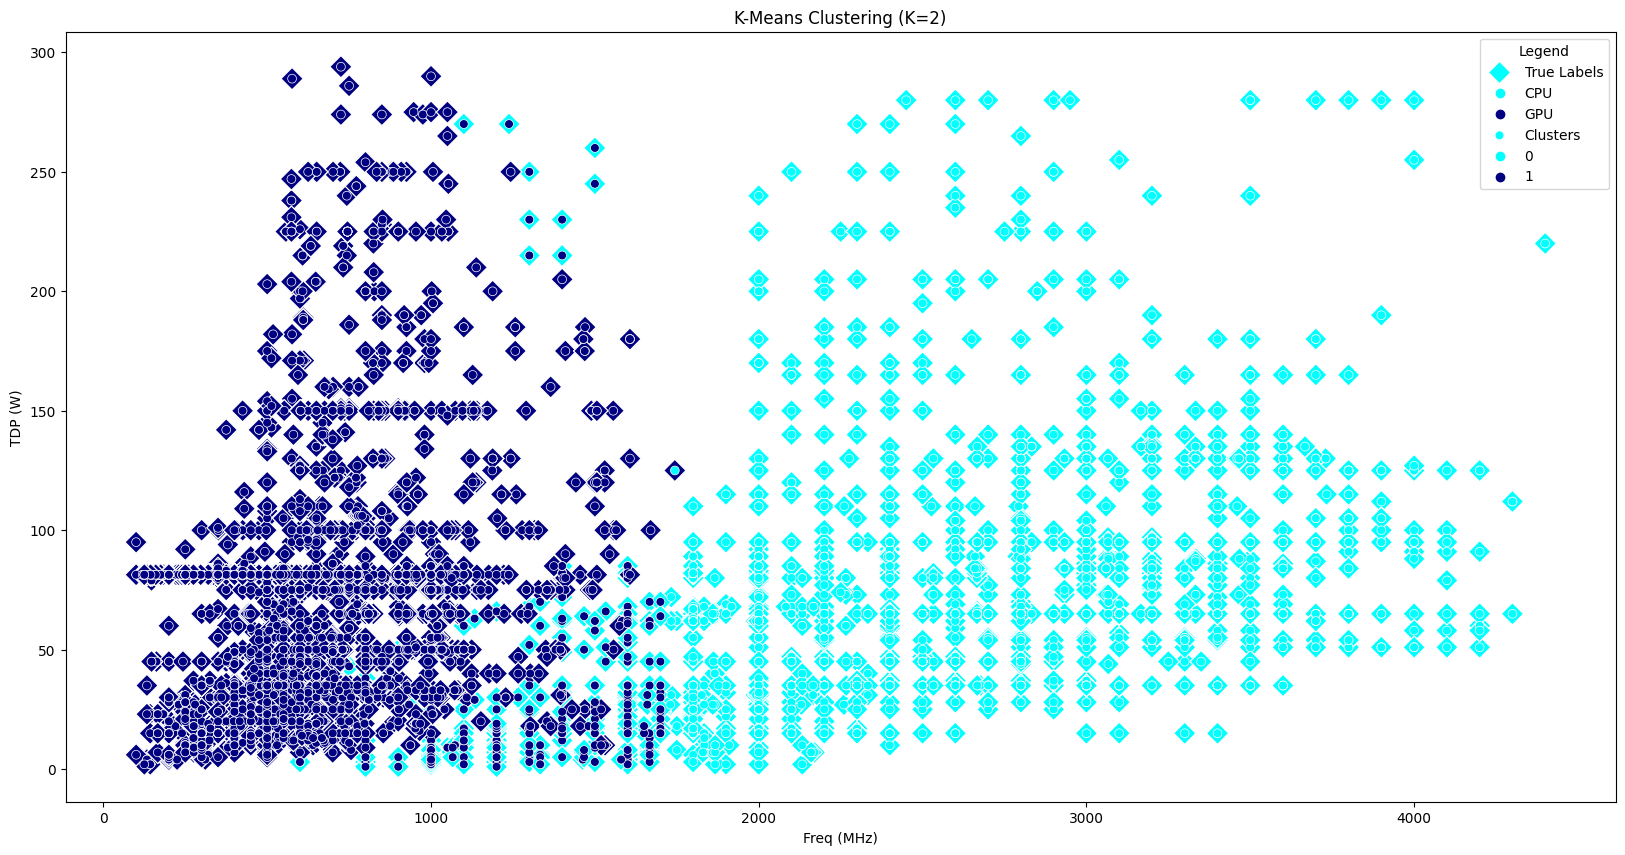

In [578]:
cluster_mapping = {0: 1, 1: 0, 2: 2}
df["cluster2"] = df["clusters"].map(cluster_mapping)

plt.figure(figsize=(20,10))
sns.scatterplot(df, x=data_banding_a, y=data_banding_b, palette=warna,
hue=pembanding, marker="D", s=130, label="True Labels")


sns.scatterplot(df, x=data_banding_a, y=data_banding_b, palette=warna,
hue="cluster2", marker="o", s=40, label="Clusters")

plt.title("K-Means Clustering (K=2)")
plt.xlabel(data_banding_a)
plt.ylabel(data_banding_b)
plt.legend(title="Legend", loc="upper right")
plt.show()

##### - Tanpa Label

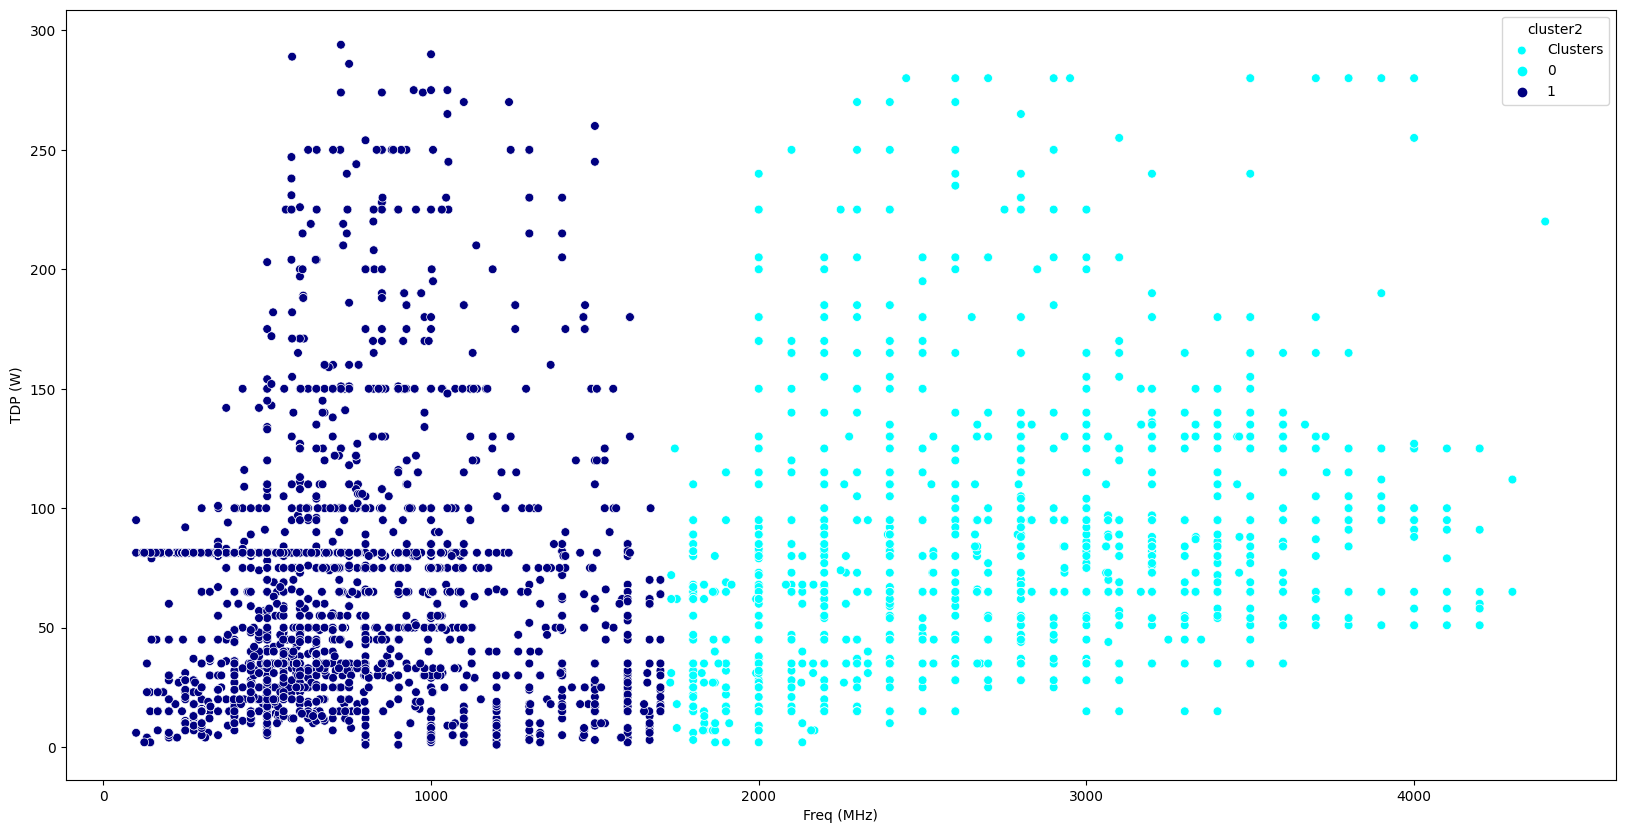

In [579]:
plt.figure(figsize=(20,10))

sns.scatterplot(df, x=data_banding_a, y=data_banding_b, palette=warna,
hue="cluster2", marker="o", s=40, label="Clusters")
plt.show()